In [12]:
from jmetal.operator import PolynomialMutation, SBXCrossover
from jmetal.operator.mutation import NonUniformMutation, UniformMutation, SimpleRandomMutation
from jmetal.util.solution import get_non_dominated_solutions
from jmetal.util.termination_criterion import StoppingByEvaluations
from modnsgaii import S_NSGAII

from jmetal.problem import ZDT1

from surrogate_models.regressor_chain_surrogate import RegressorChainSurrogate
from surrogate_models.multioutput_learning_surrogate import MultiOutputLearnerSurrogate
from surrogate_models.iSOUPTreeRegressor_surrogate import iSOUPTreeRegressorSurrogate
from surrogate_models.LSTM_surrogate import LSTMSurrogate

problem = ZDT1()

max_evaluations = 50000
#probability = 1.0 / problem.number_of_variables()
probability = 0.9
algorithm = S_NSGAII(
        problem=problem,
        population_size=100,
        offspring_population_size=100,
        mutation=PolynomialMutation(probability=probability, distribution_index=20),
        #mutation=SimpleRandomMutation(probability=probability),
        #mutation=UniformMutation(probability=probability, perturbation=0.5),
        #mutation=NonUniformMutation(probability=probability, perturbation=0.5),
        crossover=SBXCrossover(probability=1.0, distribution_index=20),
        termination_criterion=StoppingByEvaluations(max_evaluations=max_evaluations),
        batch_sample_percentaje = 0.3,
        #surrogate_ml=LSTMSurrogate(dense_layers=64, activation='tanh', optimizer='adam', epochs=20, batch_size=10),
        surrogate_ml=RegressorChainSurrogate(),
)

algorithm.run()

Train cycle:  1
Training algorithm 
duplicates rows:  12261
valida data:  2739
Train cycle:  2
Partial training algorithm
duplicates rows:  26982
previous  2739
no_duplicates  3018
valida data:  279
Number of surrogate evaluation:  200
Total surrogate evaluation:  20000
Total evaluation:  50000


In [13]:
front = get_non_dominated_solutions(algorithm.get_result())


In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
referenceFront = np.loadtxt("resources/reference_front/ZDT1.pf", delimiter=' ')
referenceFront = referenceFront[referenceFront[:, 0].argsort()]

In [16]:
objectives = [solution.objectives for solution in front]

x = [_[0] for _ in objectives]
y = [_[1] for _ in objectives]

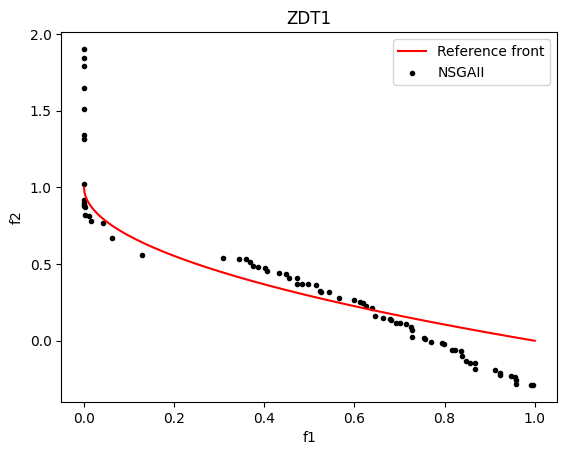

In [17]:
plt.plot(referenceFront[:,0], referenceFront[:,1], color="red")

plt.scatter(x, y, color="black", marker = '.')

plt.xlabel("f1")
plt.ylabel("f2")
plt.title(problem.name())
plt.legend(["Reference front","NSGAII"])

In [7]:
from jmetal.algorithm.multiobjective.nsgaii import NSGAII

problem = ZDT1()

max_evaluations = 50000
algorithm = NSGAII(
        problem=problem,
        population_size=100,
        offspring_population_size=100,
        mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables(), distribution_index=20),
        crossover=SBXCrossover(probability=1.0, distribution_index=20),
        termination_criterion=StoppingByEvaluations(max_evaluations=max_evaluations),
)

algorithm.run()

[2024-05-17 09:55:35,244] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-17 09:55:35,248] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-17 09:55:35,249] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-17 09:55:35,249] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-17 09:55:56,176] [jmetal.core.algorithm] [DEBUG] Finished!


In [8]:
front = get_non_dominated_solutions(algorithm.get_result())

In [9]:
objectives = [solution.objectives for solution in front]

x = [_[0] for _ in objectives]
y = [_[1] for _ in objectives]

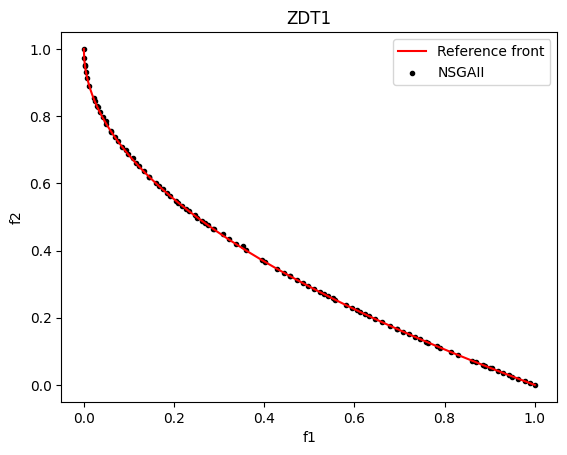

In [10]:
plt.plot(referenceFront[:,0], referenceFront[:,1], color="red")
plt.scatter(x, y, color="black", marker = '.')

plt.xlabel("f1")
plt.ylabel("f2")
plt.title(problem.name())
plt.legend(["Reference front","NSGAII"])

In [11]:
from jmetal.operator import PolynomialMutation, SBXCrossover
from jmetal.util.solution import get_non_dominated_solutions
from jmetal.util.termination_criterion import StoppingByEvaluations
from modnsgaii import S_NSGAII

from jmetal.problem import DTLZ1

from surrogate_models.regressor_chain_surrogate import RegressorChainSurrogate
from surrogate_models.multioutput_learning_surrogate import MultiOutputLearnerSurrogate

problem = DTLZ1()
#probability = 1.0 / problem.number_of_variables()
probability = 0.95

max_evaluations = 50000
algorithm = S_NSGAII(
        problem=problem,
        population_size=100,
        offspring_population_size=100,
        mutation=PolynomialMutation(probability=, distribution_index=20),
        crossover=SBXCrossover(probability=1.0, distribution_index=20),
        termination_criterion=StoppingByEvaluations(max_evaluations=max_evaluations),
        batch_sample_percentaje = 0.5,
        surrogate_ml=iSOUPTreeRegressorSurrogate(),
)

algorithm.run()

SyntaxError: invalid syntax (3651605342.py, line 20)

In [ ]:
referenceFront = np.loadtxt("resources/reference_front/DTLZ1.3D.pf", delimiter='\t')
referenceFront = referenceFront[referenceFront[:, 0].argsort()]

NameError: name 'np' is not defined